# Waste Classification using CNN Model

### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [8]:
train_path="/Users/noorshaik/Downloads/Waste Classification/DATASET/DATASET/TRAIN"
test_path="/Users/noorshaik/Downloads/Waste Classification/DATASET/DATASET/TEST"

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [10]:
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|███████████████████████████████████| 12565/12565 [00:04<00:00, 2601.86it/s]


In [11]:
data.shape

(22564, 2)

### Data Visualization 

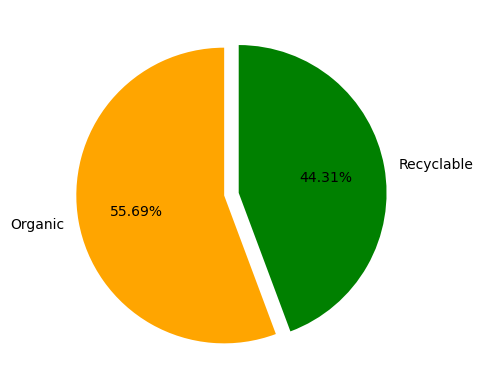

In [12]:
colors=['orange','green']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'] , autopct="%0.2f%%",colors=colors, startangle=90, explode=[0.05,0.05])
plt.show()

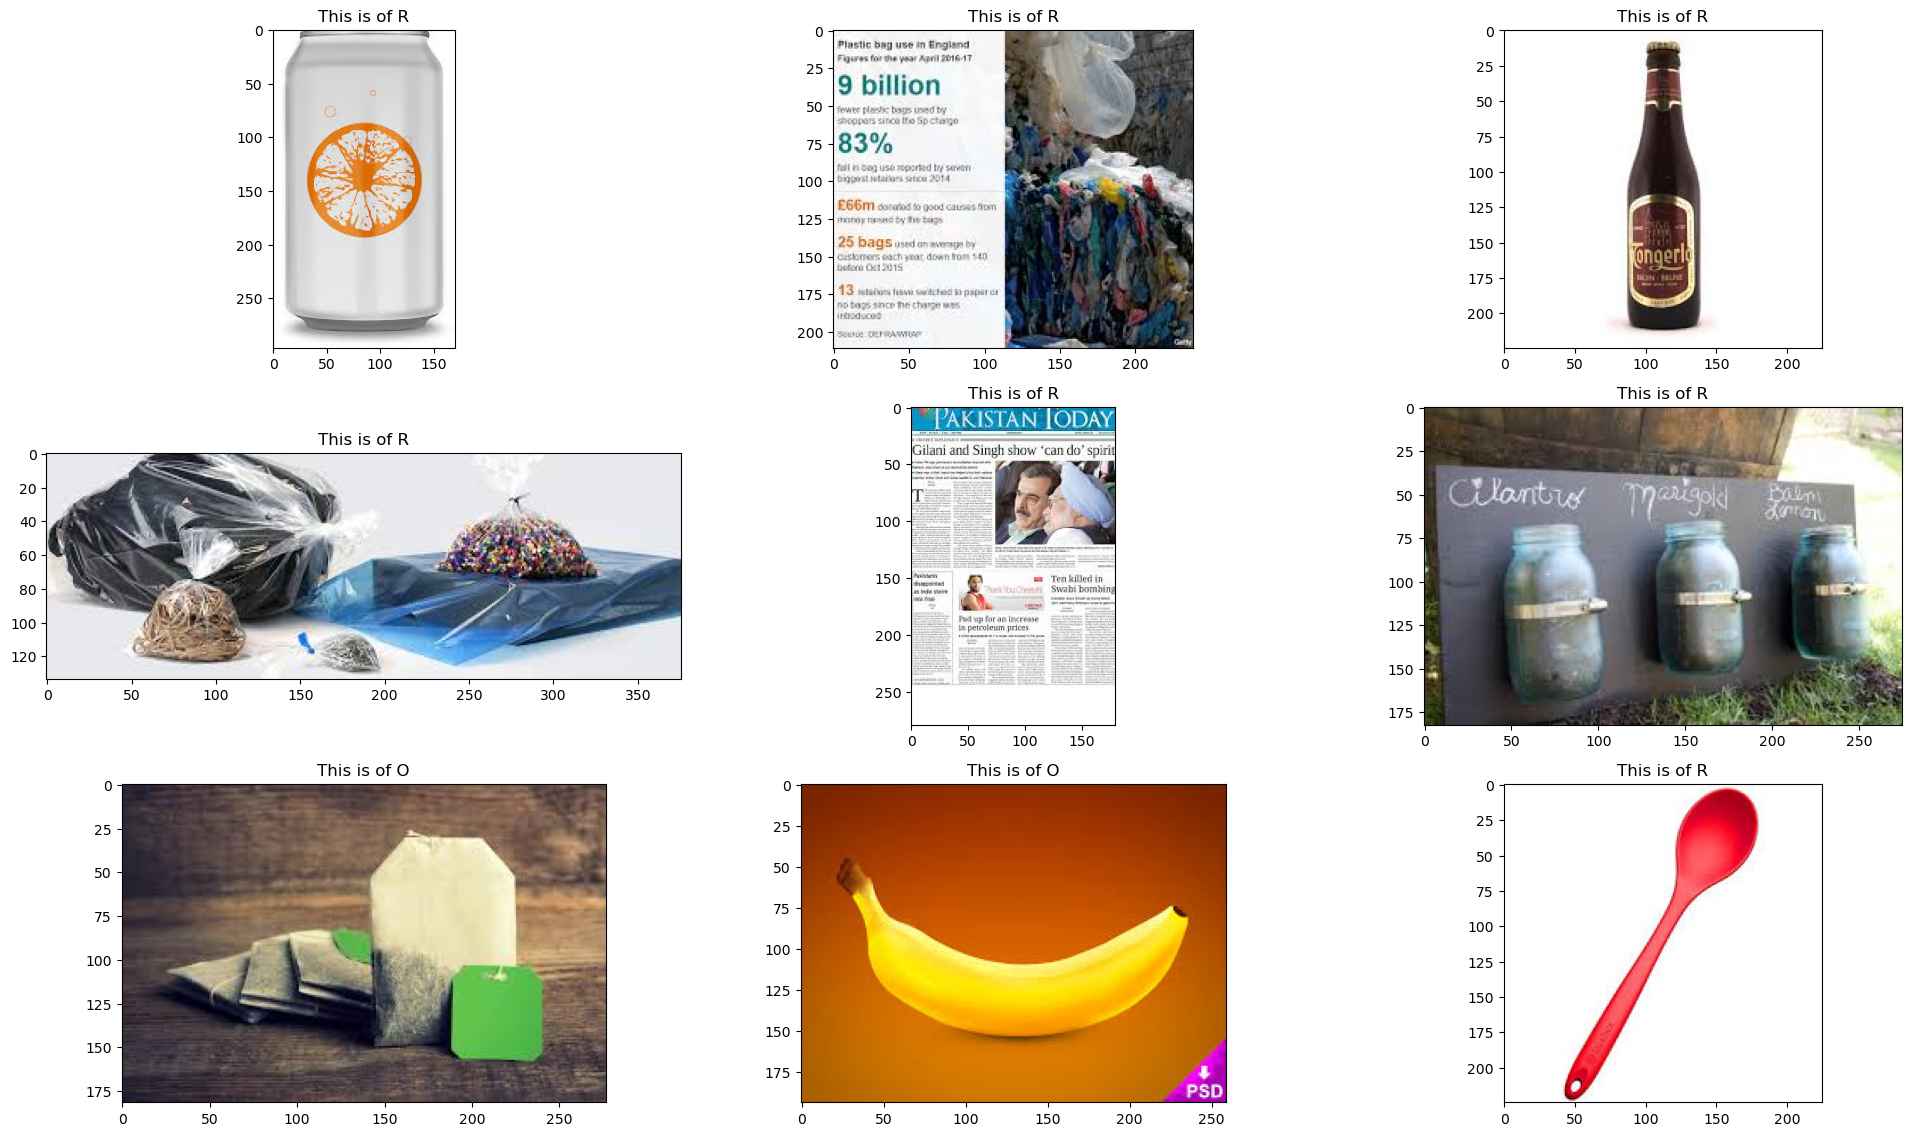

In [13]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 [==============================] - 564s 6s/step - loss: 0.5482 - accuracy: 0.7697 - val_loss: 0.3842 - val_accuracy: 0.8802
Epoch 2/10
89/89 [==============================] - 571s 6s/step - loss: 0.4102 - accuracy: 0.8346 - val_loss: 0.3368 - val_accuracy: 0.8675
Epoch 3/10
89/89 [==============================] - 571s 6s/step - loss: 0.3885 - accuracy: 0.8432 - val_loss: 0.3429 - val_accuracy: 0.8611
Epoch 4/10
89/89 [==============================] - 551s 6s/step - loss: 0.3628 - accuracy: 0.8545 - val_loss: 0.2959 - val_accuracy: 0.8834
Epoch 5/10
89/89 [==============================] - 542s 6s/step - loss: 0.3287 - accuracy: 0.8700 - val_loss: 0.2783 - val_accuracy: 0.8854
Epoch 6/10
89/89 [==============================] - 545s 6s/step - loss: 0.3063 - accuracy: 0.8794 - val_loss: 0.2539 - val_accuracy: 0.9033
Epoch 7/10
89/89 [==============================] - 538s 6s/step - loss: 0.2766 - accuracy: 0.8927 - val_loss: 0.2615 - val_accuracy: 0.8997
Epoch 8/10
89

In [20]:
model.save("/Users/noorshaik/Downloads/Waste Classification/Waste-Classification-CNN-Model.h5")

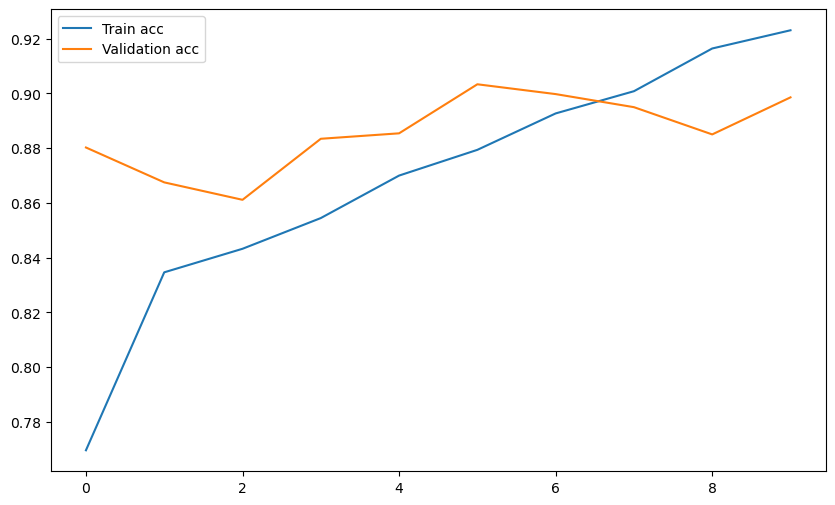

In [23]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

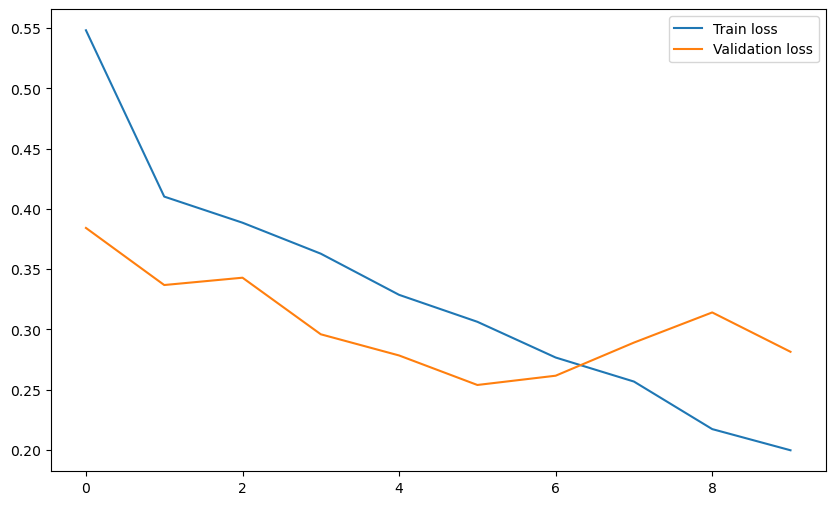

In [24]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [25]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

## organic waste

1/1 [==============================] - 0s 23ms/step
This image shows organic waste


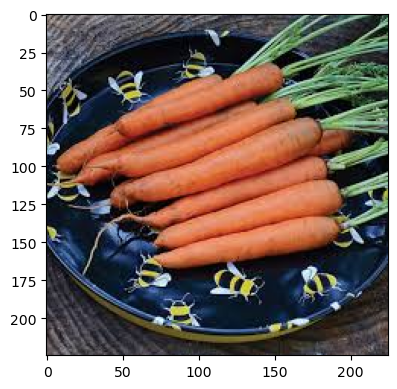

In [33]:
test_img = cv2.imread("/Users/noorshaik/Downloads/Waste Classification/DATASET/DATASET/TEST/O/O_12580.jpg")
predict_func(test_img)

## Recyclable waste

1/1 [==============================] - 0s 22ms/step
This image shows recyclable waste


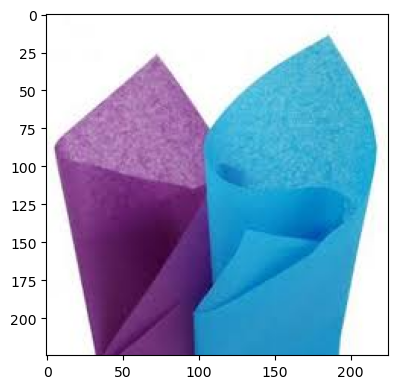

In [38]:
test_img = cv2.imread("/Users/noorshaik/Downloads/Waste Classification/DATASET/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)